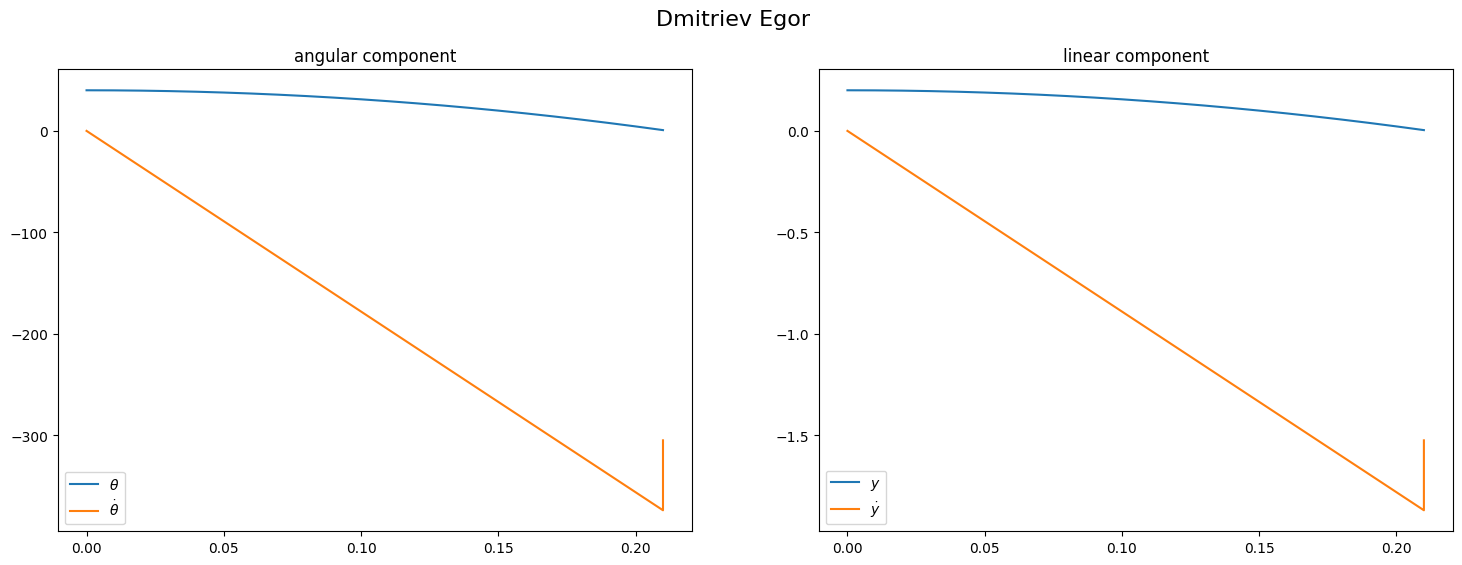

In [7]:
inertia_radius = 0.022530346
m = 0.06385
r = 0.005

J = m * inertia_radius ** 2
L = 0.2
eta = m * r / (J + m * r)
gamma = eta / r
e_eq = 1 - 2 * eta

g = 9.8

import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

dt = 0.01
phase_t_min = 0.2

X0 = np.array([L / r, 0])
A = np.array([[0, 1],
              [0, 0]])
B = np.array([0, -gamma * g])
T = np.arange(0, 200, dt)


def flip(t, y):
    return y[0]


flip.terminal = True
flip.direction = -1


def f(t, y):
    return A @ y + B


X = X0
t = T[0]
t_prev = -np.inf
ans = np.empty((2, 0))
anst = np.empty(0)
while t < T[-1] and (t - t_prev > phase_t_min):
    sol = solve_ivp(f, (t, T[-1]), X, t_eval=T[np.searchsorted(T, t):], events=flip)
    ans = np.concatenate((ans, sol.y), axis=1)
    anst = np.concatenate((anst, sol.t))
    t_prev = t
    t = sol.t[-1]
    X = sol.y[:, -1]
    X[1] = -e_eq * X[1]

grid = plt.GridSpec(1, 2, wspace=0.2, hspace=0.5)
fig = plt.figure(figsize=(18, 6))
fig.suptitle("Dmitriev Egor", fontsize=16)
ax1 = plt.subplot(grid[:, 0], title='angular component')
ax2 = plt.subplot(grid[:, 1], title='linear component')

ax1.plot(anst, np.transpose(ans))
lables1 = [r'$\theta$', r'$\dot\theta$']
ax1.legend(lables1)

ax2.plot(anst, np.transpose(ans) * r)
lables2 = [r'$y$', r'$\dot y$']
ax2.legend(lables2)